In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata

In [78]:
x_file='geo_em.d03.nc'
ds_base = xr.open_dataset(x_file)
wrf_LAT=ds_base.XLAT_M.values[0,:,:]
wrf_LON=ds_base.XLONG_M.values[0,:,:]

In [79]:
def pc_plot(grid_x, grid_y,new_Z,name):
    plt.figure(figsize=(10,10))
    plt.pcolor(grid_x, grid_y,new_Z)
    plt.colorbar()
    plt.title(name)
    plt.ylabel('y')
    plt.xlabel('x')

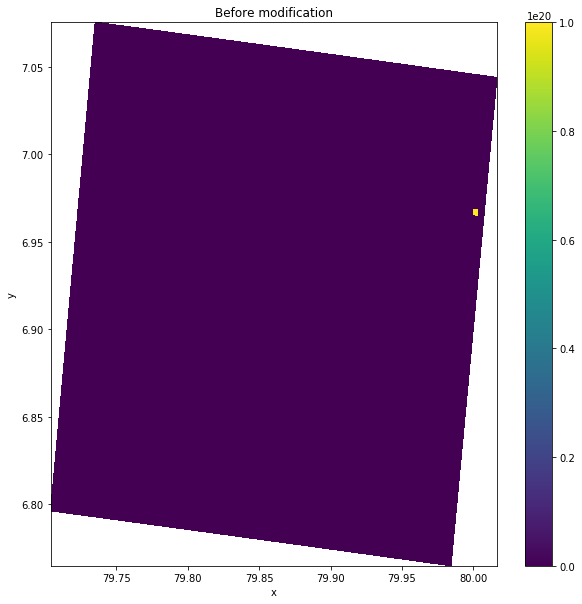

In [80]:
pc_plot(wrf_LON, wrf_LAT,ds_base['LANDUSEF'].values[0,12,:,:],'Before modification')

In [81]:
var='LANDUSEF'
for i in range(0,21):
    ds_before=ds_base[var].values[0,i,:,:]
    cell_index=np.where(ds_before>1)
    x0=cell_index[0]
    y0=cell_index[1]
    ds_before[x0,y0]=(ds_before[x0+1,y0]+ds_before[x0-1,y0]+ds_before[x0,y0+1]+ds_before[x0,y0-1])/4
    ds_base[var].values[0,i,:,:]=ds_before


list_to_change=['GREENFRAC','SOILCBOT','SOILCTOP']
dim_to_change=[12,16,16]
for var,dim in zip(list_to_change,dim_to_change):
    for i in range(0,dim):
        ds_before=ds_base[var].values[0,i,:,:]
        ds_before[x0,y0]=(ds_before[x0+1,y0]+ds_before[x0-1,y0]+ds_before[x0,y0+1]+ds_before[x0,y0-1])/4
        ds_base[var].values[0,i,:,:]=ds_before
        
list_to_change=['LANDMASK','SCB_DOM','SCT_DOM',]
for var in list_to_change:
    ds_before=ds_base[var].values[0,:,:]
    ds_before[x0,y0]=(ds_before[x0+1,y0]+ds_before[x0-1,y0]+ds_before[x0,y0+1]+ds_before[x0,y0-1])/4
    ds_base[var].values[0,:,:]=ds_before

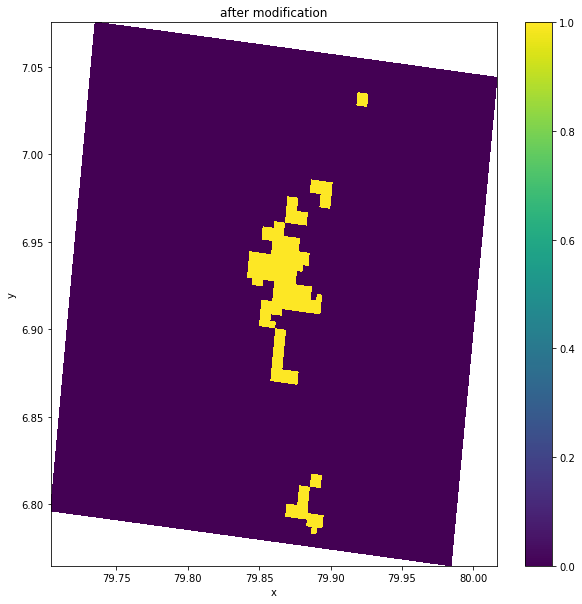

In [82]:
pc_plot(wrf_LON, wrf_LAT,ds_base['LANDUSEF'].values[0,12,:,:],'after modification')

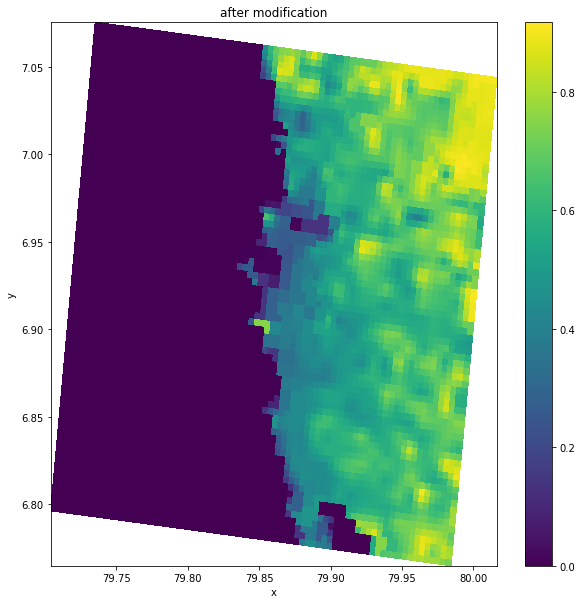

In [84]:
pc_plot(wrf_LON, wrf_LAT,ds_base['GREENFRAC'].values[0,5,:,:],'after modification')

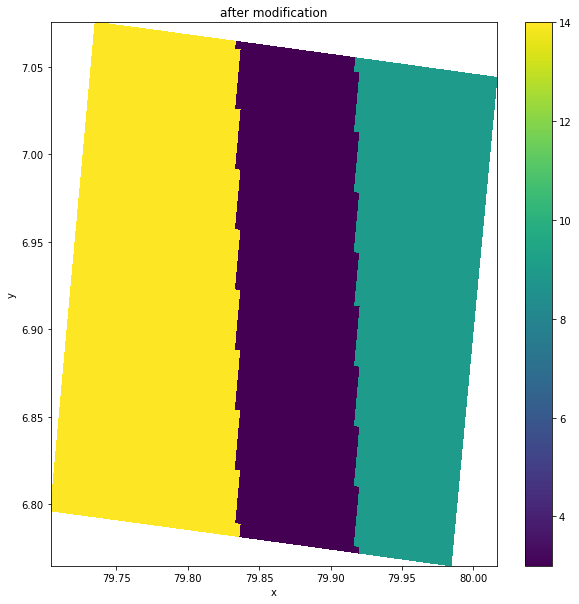

In [83]:
pc_plot(wrf_LON, wrf_LAT,ds_base['SCB_DOM'].values[0,:,:],'after modification')

In [85]:
ds_merged = ds_base.update(ds_base)    

for var in ds_merged.data_vars.keys():
    if 'coordinates' in ds_merged[var].attrs:
        del ds_merged[var].attrs['coordinates']
        
file_out = x_file+'.new'

ds_merged.to_netcdf(file_out,
                    mode='w', format='NETCDF3_64BIT')
print('SUEWS input has beened added to:' + file_out)

SUEWS input has beened added to:geo_em.d03.nc.new
